In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
data = load_breast_cancer()
description = data.DESCR.split('\n')
print('\n'.join(description[11:31]))

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - class:
            - WDBC-Malignant
            - WDBC-Benign


In [20]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.shape

(569, 31)

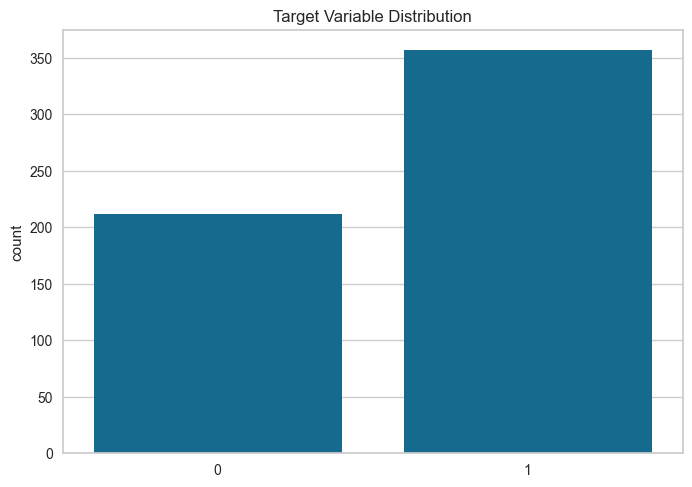

In [21]:
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('')
plt.show()

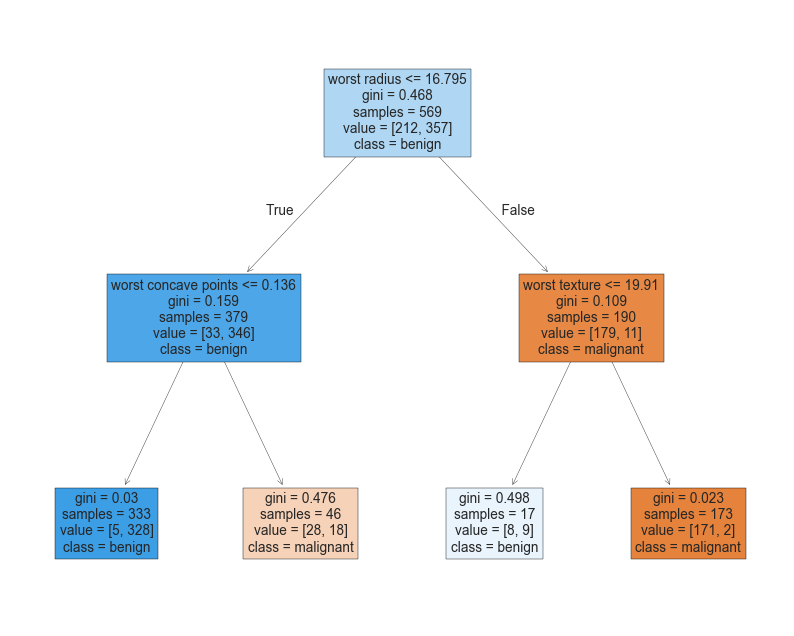

In [22]:
clf = DecisionTreeClassifier(max_depth=2)
x = data.data
y = data.target
clf.fit(x, y)
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()

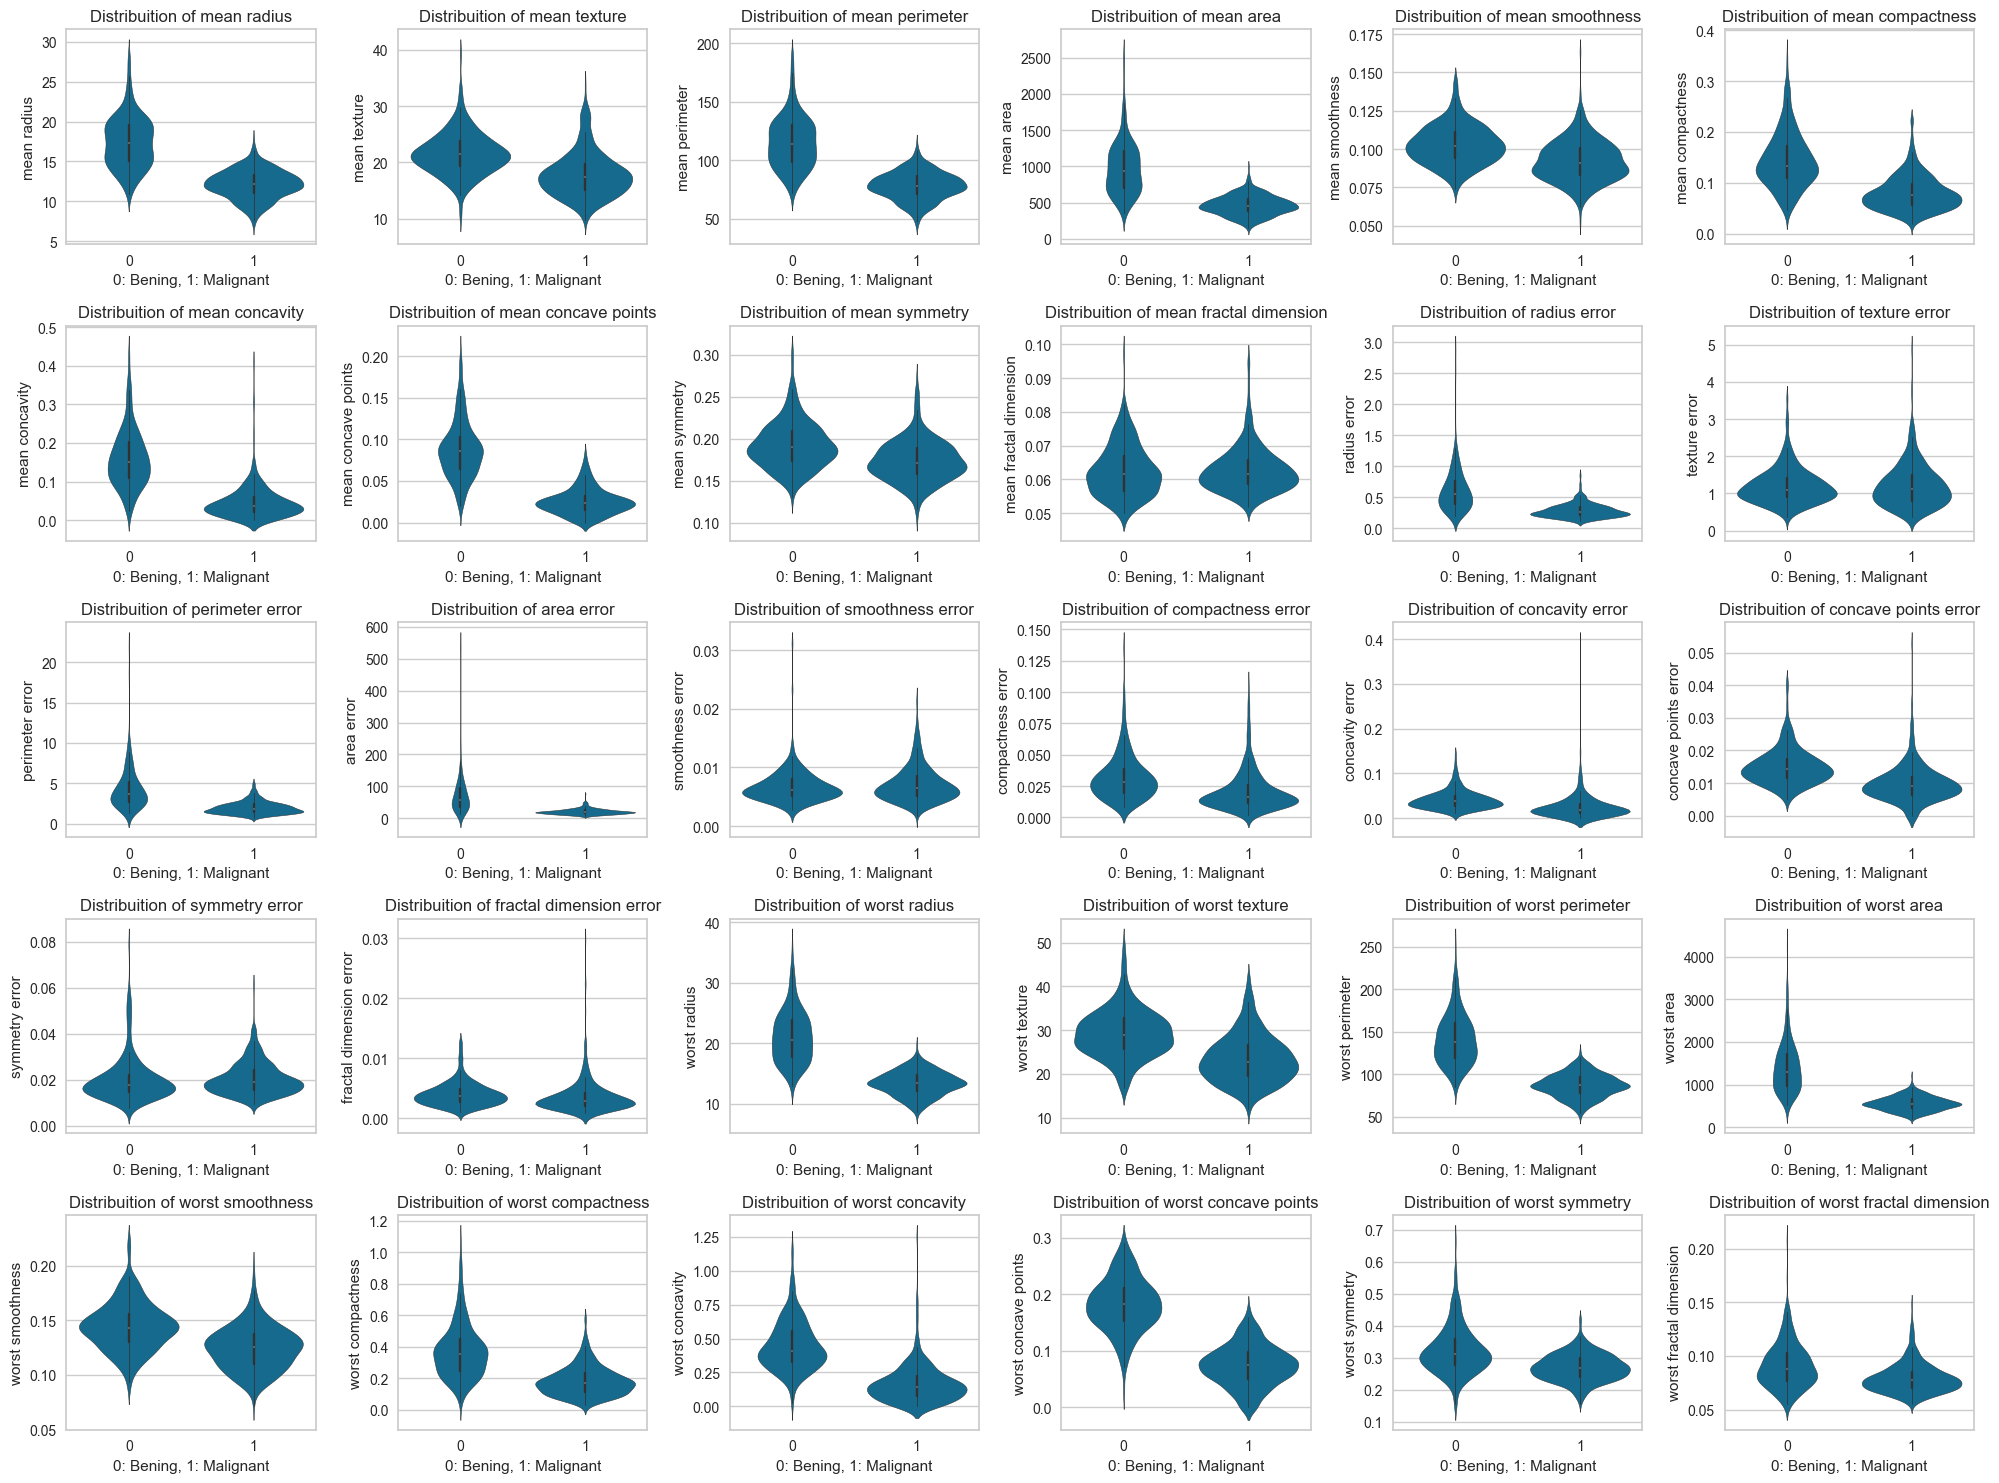

In [23]:
features = df.columns[:-1]
fid, axs = plt.subplots(nrows=5, ncols=6, figsize=(20,15))
axs = axs.flatten()
for i, feature in enumerate(features):
    sns.violinplot(x='target', y=feature, data=df, split=False, ax=axs[i])
    axs[i].set_title(f'Distribuition of {feature}')
    axs[i].set_xlabel('0: Bening, 1: Malignant')
    axs[i].set_ylabel(feature)

for i in range(len(features), len(axs)):
    axs[i].remove()

plt.tight_layout()
plt.show()

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [25]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size=0.25, random_state=0)

In [26]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=2)
svm.fit(x_treinamento, y_treinamento)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
previsoes = svm.predict(x_teste)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_teste, previsoes)
accuracy 

0.958041958041958

0.958041958041958

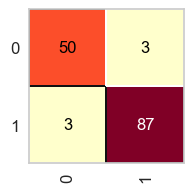

In [28]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
x_treinamento_pca = pca.fit_transform(x_treinamento)
x_teste_pca = pca.transform(x_teste)
x_treinamento_pca

array([[-2.8380771 , -0.3193802 , -0.50978696, ...,  0.49249379,
         0.23995204, -0.05185671],
       [-3.23881077,  0.94669515,  1.4630147 , ..., -0.69574438,
        -0.35857808,  0.25012453],
       [ 3.92831902, -3.3009157 ,  1.84183164, ..., -0.1070366 ,
        -0.39989579,  0.16487406],
       ...,
       [-3.17962251,  0.43326773,  0.57700503, ...,  0.71776601,
        -0.74860928,  0.19161598],
       [-5.59141525, -0.75288918,  4.06478207, ..., -2.52874458,
        -3.1817311 , -0.13387697],
       [-1.20802261,  1.32965049,  1.26115052, ..., -0.31497313,
        -1.39440128, -0.09680889]])

In [33]:
svm_pca = SVC(kernel='linear', C=2)
svm_pca.fit(x_treinamento_pca, y_treinamento)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
previsoes = svm_pca.predict(x_teste_pca)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_teste, previsoes)
accuracy 

0.958041958041958

In [35]:
from sklearn.feature_selection import f_classif, SelectKBest
selecao = SelectKBest(f_classif, k=7)
x_anova = selecao.fit_transform(x,y)

In [45]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_anova, y, test_size=0.3, random_state=42)


In [47]:
svm_anova = SVC(kernel='linear', C=2)
svm_anova.fit(x_treino, y_treino)

,C,2
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [49]:
from sklearn.model_selection import GridSearchCV
parametros = {'C' : [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [51]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x, y)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 1.5, 'kernel': 'rbf'}
0.9771619313771154


In [53]:
from sklearn.model_selection import cross_val_score, KFold

In [55]:
resultado_svm = []

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True, random_state=i)

svm = SVC(kernel= 'rbf', C=1.5)
scores = cross_val_score(svm, x, y, cv=kfold)
resultado_svm.append(scores.mean())
resultado_svm

[0.9771929824561403]